<a href="https://colab.research.google.com/github/VitorSancho/Estudos_FormacaoEstatisticaAlura/blob/main/Curso_de_Estat%C3%ADstica_Parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

dados=pd.read_csv("/content/drive/My Drive/dados.csv")


Mounted at /content/drive


In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# <font color=green>2 TESTES DE HIPÓTESES</font>
***

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

## <font color=green>2.1 Teste de normalidade</font>
***

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [ ]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

### Definindo a significância do teste ($\alpha$)

In [ ]:
# significancia é a diferença entre 1-intervalo de confiança
significancia=0.05

### Testando a variável Renda

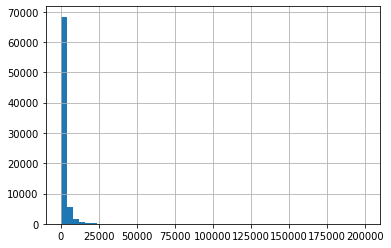

In [ ]:
dados.Renda.hist(bins=50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
stat_test,p_valor=normaltest(dados.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0


In [ ]:
p_valor<=significancia

True

## Testando a variavel Altura

In [ ]:
stat_test_altura,p_valor_altura=normaltest(dados.Altura)
print(stat_test_altura)
print(p_valor_altura)

0.19973093957002253
0.9049591541967501


In [ ]:
p_valor_altura<=significancia

False

## <font color=green>2.2 Etapas Básicas de um Teste</font>
***

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

# <font color=green>3 TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

## <font color=green>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [ ]:
amostra=[509,505,495,510,496,509,497,502,503,505,
         501,505,510,505,504,497,506,506,508,505,
         497,504,500,498,506,496,508,497,503,501,
         503,506,499,498,509,507,503,499,509,495,
         502,505,504,509,508,501,505,497,508,507]

In [ ]:
amostra=pd.DataFrame(amostra,columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [ ]:
media_amostra=amostra.mean()
media_amostra

Amostra    503.24
dtype: float64

In [ ]:
desvio_padrao_amostra=amostra.std()[0]
desvio_padrao_amostra

4.483803050527347

In [ ]:
media=500
significancia=0.05
confianca=1-significancia
n=50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

texto em itálico### $H_0: \mu = 500$ ->> igual sempre deve estar na hipotee nula

### $H_1: \mu \neq 500$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
from scipy.stats import norm

In [ ]:
probabilidade=(0.5+(confianca/2))
probabilidade

0.975

### Obtendo $z_{\alpha/2}$

In [ ]:
z_alpha_2=norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
z=(media_amostra-media)/(desvio_padrao_amostra/np.sqrt(n))
z

Amostra    5.10956
dtype: float64

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

In [ ]:
# Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. 
# Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. 
# Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. 
# Considerando um nível de significância igual a 5%, responda as seguintes questões:

# 1) Qual a hipótese nula a ser testada?
# 2) Qual o valor da estatística de teste?
# 3) Qual a conclusão do teste?


#  HIPOTESE NULA: 500=485

media_fabricante=500
n_embalagens=30
media_amostras=485
desv_pad_populacional=20
significancia_problema2=0.05
confianca_prob2=0.975

z_problema2=norm.ppf(confianca_prob2)

z_amostras=(media_amostras-media_fabricante)/(desv_pad_populacional/np.sqrt(n_embalagens))
z_amostras<=-z_problema2

True

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [ ]:
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ztest(x1=amostra,value=media)

(array([5.10955978]), array([3.22910317e-07]))

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test=DescrStatsW(amostra)


In [ ]:
test.ztest_mean(value=media)

(array([5.10955978]), array([3.22910317e-07]))

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

### Construindo tabela $t$ de Student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

---

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [ ]:
amostra_refri=[37.27,36.42,34.84,34.60,37.49,
         36.53,35.49,36.90,34.52,37.30,
         34.99,36.55,36.29,36.06,37.42,
         34.47,36.70,35.86,36.80,36.92,
         37.04,36.39,37.32,36.64,35.45]

In [ ]:
amostra_refri=pd.DataFrame(amostra_refri,columns=['Amostra'])

In [ ]:
media_refri=amostra_refri.mean()[0]

media_refri

36.250400000000006

In [ ]:
desv_pad_refri=amostra_refri.std()[0]
desv_pad_refri

0.9667535018469453

In [ ]:
media_fabricante=37
significancia=0.05
confianca=1-significancia
n_refri=25
grau_de_lib=n_refri-1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [ ]:
from scipy.stats import t as t_student

### Obtendo $t_{\alpha}$

In [ ]:
t_alpha=t_student.ppf(confianca,grau_de_lib)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
t=(media_refri-media_fabricante)/(desv_pad_refri/np.sqrt(n_refri))
t

-3.876893119952045

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
t>=t_alpha

False

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

In [ ]:
# A empresa Limpa Esgoto garante ser capaz de realizar o tratamento de esgoto e obter, no máximo, 
# 150 g de impurezas para cada mil litros de esgoto tratado. 
# Vinte amostras de mil litros de esgoto apresentaram, em média, 
# 230 g de impurezas e desvio padrão amostral igual a 90 g.

# Assumindo alfa igual a 5% e população normalmente distribuída,
#  seria possível discordar da empresa Limpa Esgoto? 
#  Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

media_empresa=150
amostras_esgoto=20
media_amostras_esgoto=230
des_pad_amostras_esgoto=90
significancia=0.05
confianca=1-significancia
grau_lib_esgoto=amostras_esgoto-1

t_alpha_esgoto=t_student.ppf(confianca,grau_lib_esgoto)
t_amostra=(media_amostras_esgoto-media_empresa)/(des_pad_amostras_esgoto/np.sqrt(amostras_esgoto))

if t_amostra>t_alpha_esgoto:
  print("Deve-se rejeitar Ho, ou seja, a empresa não faz tratamento adequado, pois as amostras apresentam mais impurezas do que a empresa relata!")

t_alpha_esgoto



Deve-se rejeitar Ho, ou seja, a empresa não faz tratamento adequado, pois as amostras apresentam mais impurezas do que a empresa relata!


1.729132811521367

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
t

-3.876893119952045

In [ ]:
pa_valor=t_student.sf(t,df=24)
pa_valor

0.9996406170303819

In [ ]:
pa_valor<significancia

False

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test=DescrStatsW(amostra)

In [ ]:
t,p_valor,df=test.ttest_mean(value=37,alternative='larger')

In [ ]:
# A pizzaria Muito Queijo alega que a quantidade de queijo em suas pizzas tamanho família é de, no mínimo, 350 g. 
# Uma amostra de 35 pizzas tamanho família revelou uma média de 330 g de queijo por pizza. 
# O desvio padrão amostral foi de 80 g.

# Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da alegação da pizzaria? 
# Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.

media_pizzaria=350
n_pizzas=35
media_amostras_queijo=330
desv_pad_queijo=80
significancia=0.05
confianca=1-significancia

z_queijo=-norm.ppf(confianca)
z_queijo

z_amostras=(media_amostras_queijo-media_pizzaria)/(desv_pad_queijo/np.sqrt(n_pizzas))

if z_amostras>z_queijo:
  print("A pizzaria tem sim no mínimo 350g de queijo por pizza!")


A pizzaria tem sim no mínimo 350g de queijo por pizza!


---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [ ]:
homens=dados.query('Sexo==0').sample(n=500,random_state=101).Renda
mulheres=dados.query('Sexo==1').sample(n=500,random_state=101).Renda

### Dados do problema

In [ ]:
media_amostra_M=mulheres.mean()
media_amostra_H=homens.mean()

In [ ]:
desv_pad_M=mulheres.std()
desv_pad_H=homens.std()

In [ ]:
significancia=0.01
confianca=1-significancia
n_M=500
n_H=500
D_0=0 # diferenca entre as medias

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### <font color='red'>Observação importante</font>
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
probabilidade=confianca
probabilidade

0.99

In [ ]:
z_alpha=norm.ppf(probabilidade)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [ ]:
numerador=(media_amostra_H-media_amostra_M)-D_0
denominador=np.sqrt(((desv_pad_H**2/n_H)+(desv_pad_M**2/n_M)))
z=numerador/denominador
z

5.86562005776475

In [ ]:
# Um fabricante de cosméticos afirma que a adição de um novo composto químico em sua linha de shampoos consegue promover em mais de 2 centímetros 
# o crescimento dos fios de cabelo em um período de 60 dias.
# Duas amostras de pessoas foram selecionadas e testadas, uma utilizando o shampoo novo (com o composto) e a outra com o shampoo antigo (sem o composto).

# Os resultados (crescimento dos fios de cabelo em centímetros) podem ser verificados na tabela abaixo:
Shampoo_novo=[3.4,4.9,2.8,5.5,2.5,3.7,4.6,4.3,3.7,3.4]	
Shampoo_antigo=[0.3,1.2,1.2,1.7,1.1,0.6,1.2,1.5,0.5,0.7]
# Assumindo um nível de confiança de 95% e considerando que as populações se distribuem como uma normal, podemos acreditar na afirmação do fabricante do shampoo? 
# Assinale a alternativa que apresenta a estatística de teste e a decisão correta do teste.
# Um pouco mais de teoria: como se trata de um problema um pouco diferente do apresentado em nossa aula, vamos esclarecer alguns pontos para ajudar na solução:

# 1) Em testes entre duas amostras, quando realizamos a escolha da distribuição amostral adequada (passo 2) e perguntamos se n ≥ 30,
#  temos que considerar que n = n1 + n2, onde n1 é o tamanho da primeira amostra e n2 o tamanho da segunda;

# 2) Quando n1 + n2 ≥ 30, utilizamos z (normal),
# e quando n1 + n2 < 30, σ não for conhecido e as populações forem normalmente distribuídas, utilizamos t (t-Student);

# 3) Quando utilizamos a tabela t de Student, em teste de duas amostras, os graus de liberdade são obtidos da seguinte forma: n1 + n2 - 2;

# 4) Quando o problema nos pergunta se podemos acreditar na afirmação do fabricante, está nos indicando o que devemos testar, 
# ou seja, a nossa hipótese alternativa (H1), que no caso é:

# 5) Em nosso próximo vídeo, utilizaremos o ztest_ind() para solucionar problemas como este. 
# Um teste similar ao ztest_ind(), que utiliza a distribuição t de Student, é o ttest_ind(). 
# Aqui, você será redirecionado para a documentação. Observe que o ttest_ind() retorna a estatística de teste, o p-valor e também os graus de liberdade.
from scipy.stats import t as t_student
import numpy as np
import pandas as pd

shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

media_A = shampoo_Novo.mean()
desvio_padrao_A = shampoo_Novo.std()

media_B = shampoo_Antigo.mean()
desvio_padrao_B = shampoo_Antigo.std()

significancia = 0.05
confianca = 1 - significancia
n_A = len(shampoo_Novo)
n_B = len(shampoo_Antigo)
D_0 = 2

graus_de_liberdade = n_A + n_B - 2

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

numerador = (media_A - media_B) - D_0
denominador = np.sqrt((desvio_padrao_A ** 2 / n_A) + (desvio_padrao_B ** 2 / n_B))
t = numerador / denominador

print('t =', round(t, 4))

if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t = 2.6646
Rejeitar H0


![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [ ]:
test_H=DescrStatsW(homens)
test_M=DescrStatsW(mulheres)

In [ ]:
test=test_H.get_compare(test_M)

In [ ]:
z,p_value=test.ztest_ind(alternative='larger',value=0) # larger para teste unicaudal superior

In [ ]:
testee=CompareMeans(test_M,test_H)

In [ ]:
z_B,p_value_B=testee.ztest_ind(alternative='larger',value=0) # larger para teste unicaudal superior

---

# <font color=green>4 TESTES NÃO PARAMÉTRICOS</font>
***

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

## <font color=green>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

### Construindo tabela $\chi^2$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [ ]:
tabela_t_chi_2 = pd.DataFrame([],
index=[i for i in range(1, 31)],
columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995])
  
for index in tabela_t_chi_2.index:
     for column in tabela_t_chi_2.columns:
         tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)
  
tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)
tabela_t_chi_2


NameError: ignored

In [ ]:
}

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

### Dados do problema

In [ ]:
F_observada=[17,33]
F_esperada=[25,25]
significancia=0.05
confianca=1-significancia
k=2 #número de eventos possíveis - cara ou coroa
graus_de_liberdade=k-1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

---

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [ ]:
from scipy.stats import chi

### Obtendo $\chi_{\alpha}^2$

In [ ]:
chi_2_alpha=chi.ppf(confianca,graus_de_liberdade)**2
chi_2_alpha

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [ ]:
chi_2=((F_observada[0]-F_esperada[0])**2/F_esperada[0])+((F_observada[1]-F_esperada[1])**2/F_esperada[1])

In [ ]:
chi_2

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
chi_2

In [ ]:
chi_raiz=np.sqrt(chi_2)
chi_raiz

In [ ]:
p_valor=chi.sf(chi_raiz,df=1)
p_valor

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [ ]:
from scipy.stats import chisquare

In [ ]:
chi_quadrado,p_valor_chi_quadrado=chisquare(f_obs=F_observada,f_exp=F_esperada)

In [ ]:
chi_quadrado

In [ ]:
# A realização de um teste não paramétrico Qui-quadrado, com apenas 5 graus de liberdade, 
# obteve-se a estatística de teste no valor de 7,45.

# Qual seria o p-valor para este teste?

chi_quadrado2=7.45
raiz_chi_quadrado2=np.sqrt(chi_quadrado2)
p_valor2=chi.sf(raiz_chi_quadrado2,df=5)
p_valor2


---

## <font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## <font color=green>4.2 Teste Wilcoxon</font>
### Comparação de duas populações - amostras dependentes
***

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

### Dados do problema

In [ ]:
fumo={
  'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
  'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]}
fumo=pd.DataFrame(fumo)
significancia=0.05
confianca=1-significancia
n=len(fumo['Antes'])
n  

In [ ]:

fumo.head()

In [ ]:
media_antes=fumo.Antes.mean()

In [ ]:
media_depois=fumo.Depois.mean()

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} > \mu_{depois}$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 20?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $z_{\alpha/2}$

In [ ]:
probabilidade=(0.5+(confianca/2))
probabilidade

In [ ]:
z_alpha_2=norm.ppf(probabilidade)
z_alpha_2.round(2)

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

# $$\mu_T = \frac{n(n+1)}{4}$$
# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

In [ ]:
fumo

In [ ]:
fumo['Dif']=fumo["Depois"]-fumo["Antes"]
fumo['|Dif|']=abs(fumo["Antes"]-fumo["Depois"])

In [ ]:
fumo.sort_values(by="|Dif|",inplace=True)
fumo["Posto"]=range(1,len(fumo)+1)

In [ ]:
posto=fumo[['|Dif|','Posto']].groupby(['|Dif|']).mean()
posto.reset_index(inplace=True)
posto

In [ ]:
fumo.drop(['Posto'],axis=1,inplace=True)
fumo

In [ ]:
fumo=fumo.merge(posto,left_on='|Dif|',right_on='|Dif|',how='left')
fumo

In [ ]:
fumo['Posto (+)']=fumo.apply( lambda x: x.Posto if x.Dif>0 else 0, axis=1)
fumo['Posto (-)']=fumo.apply( lambda x: x.Posto if x.Dif<0 else 0, axis=1)
fumo.head()

### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

In [ ]:
T=min(fumo['Posto (+)'].sum(),fumo['Posto (-)'].sum())
T

### Obter $\mu_T$

# $$\mu_T = \frac{n(n+1)}{4}$$


In [ ]:
mu_t=(n*(n+1))/4

### Obter $\sigma_T$

# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [ ]:
sigma_T=np.sqrt((n*(n+1)*((2*n)+1))/24)
sigma_T

### Obter $Z_{teste}$

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [ ]:
Z=(T-mu_t)/sigma_T
Z

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

In [ ]:
Z>=z_alpha_2 or -Z<=-z_alpha_2

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
_,p_valor=wilcoxon(fumo.Antes,fumo.Depois)

In [ ]:
p_valor<=significancia # ou sej,a para nossa hipótese ser vpalida, nossa significancia 
# deveria ser bem menor.
# ou seja, deveríamos aumentar nosso intervalo de confianca

---

In [ ]:
#  Desconfiado da eficiência dos cursos e materiais de estudo online da Alura, um professor resolveu realizar um teste com um grupo de 14 alunos de sua classe. 
#  Para isto, ele submeteu estes alunos a duas etapas distintas e logo depois de cada etapa, aplicou uma avaliação. 
#  Na etapa inicial, foram oferecidas aulas normais, sem a utilização do material de apoio da Alura. 
#  Na segunda etapa, foram também oferecidas aulas normais, mas com a utilização do material de apoio da Alura. 
#  As notas obtidas pelos alunos estão na tabela abaixo:

notas={'Sem_alura':[7,8,6,6,10,4,2,5,9,2,4,9,1,10],
'Com_alura':[10,10,9,9,9,7,5,8,10,6,3,7,4,8]}

notas=pd.DataFrame(notas)
_,p_valor=wilcoxon(notas.Sem_alura,notas.Com_alura)
significancia=0.1

p_valor<=significancia
_



## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

## <font color=green>4.3 Teste de Mann-Whitney</font>
### Comparação de duas populações - amostras independentes
***

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

### Seleção das amostras

In [ ]:
mulheres=dados.query('Sexo==1 and Renda>0').sample(n=8,random_state=101).Renda
homens=dados.query('Sexo==0 and Renda>0').sample(n=6,random_state=101).Renda

### Dados do problema

In [ ]:
media_H=homens.mean()
media_M=mulheres.mean()

In [ ]:
significancia=0.05
confianca=1-significancia
n_1=len(homens) #n 1 sempre é a amostra de menor tamanho
n_2=len(mulheres)

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino
### $\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

### $
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

Deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $t_{\alpha}$

In [ ]:
graus_de_liberdade=n_1+n_2-2
graus_de_liberdade

In [ ]:
t_alpha=t_student.ppf(significancia, graus_de_liberdade)
t_alpha.round(2)

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img023.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
## 1. Definir os n's:
### $n_1$ = nº de elementos do menor grupo
### $n_2$ = nº de elementos do maior grupo
---
## 2. Obter a soma dos postos
### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$
---
## 3. Obter as estatísticas
# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$
---
## 4. Selecionar o menor U
# $$u = min(u_1, u_2)$$
---
## 5. Obter a estatística de teste
# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

Onde

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$
# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

### Obtendo os postos

In [ ]:
H=pd.DataFrame(homens)
H['Sexo']='Homens'
M=pd.DataFrame(mulheres)
M['Sexo']='Mulheres'
sexo=H.append(M)
sexo.reset_index(inplace=True,drop=True)
sexo.sort_values(by='Renda',inplace=True)
sexo['Posto']=range(1,len(sexo)+1)
posto=sexo[['Renda','Posto']].groupby(['Renda']).mean()
posto.reset_index(inplace=True)
sexo.drop(['Posto'],axis=1,inplace=True)
sexo=sexo.merge(posto,left_on='Renda',right_on='Renda',how='left')

### Obtendo $R$

### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$

In [ ]:
Temp=sexo[['Sexo','Posto']].groupby('Sexo').sum()
R_1=Temp.loc['Homens'][0]
R_2=Temp.loc['Mulheres'][0]
Temp

### Obter $u$

# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$

# $$u = min(u_1, u_2)$$


In [ ]:
u1=n_1*n_2+((n_1*(n_1+1))/2)-R_1
u2=n_1*n_2+((n_1*(n_1+1))/2)-R_2

In [ ]:
u=min(u1,u2)

In [ ]:
u

### Obter $\mu{(u)}$

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$

In [ ]:
mu_u=(n_1*n_2)/2
mu_u

### Obter $\sigma{(u)}$

# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

In [ ]:
sigma_u=np.sqrt(n_1*n_2*(n_1+n_2+1)/12)
sigma_u

### Obter $Z$

# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

In [ ]:
Z=(u-mu_u)/sigma_u
Z.round(2)

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img024.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img025.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -t_{\alpha}$

In [ ]:
Z<=t_alpha

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
_,p_valor=mannwhitneyu(mulheres,homens,alternative='less') #less para comparação unicaudal inferior
_

In [ ]:
p_valor<=significancia # p_valor diz o valor de significancia que o teste deveria ter para a hipótese nula ser aceita

In [ ]:
# Um professor acredita que alunos que praticam exercícios físicos têm uma performance média escolar superior àquela obtida por alunos que não praticam. 
# Para provar sua teoria, selecionou duas amostras aleatórias, uma com 9 alunos que não praticam exercícios físicos e outra com 10 alunos que cultivam o hábito de se exercitar. 
# A tabela abaixo mostra as notas dos alunos no último ano:

sem_exercicio=[7,6,7,8,6,8,6,9,5]
com_exercicio=[8,7,6,6,8,6,10,6,7,8]

# Teste a hipótese da média das notas dos alunos que praticam exercícios ser maior que a média das notas dos alunos que não praticam. Assinale a alternativa que apresenta o resultado do teste (estatística de teste u e decisão do teste). 
# Considere um nível de significância de 10%.

significancia=0.1

_,p_valor=mannwhitneyu(sem_exercicio,com_exercicio,alternative='less')
p_valor<=significancia # ou seja, a hipótese nula é valor para um significncia de até 35%




---